In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
%matplotlib inline

from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.compose import TransformedTargetRegressor
from sklearn.pipeline import FeatureUnion, Pipeline, make_pipeline
from sklearn.base import BaseEstimator, TransformerMixin

In [3]:
# load data

df = pd.read_csv('../data/heart_cleveland_upload.csv')
df.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
0,69,1,0,160,234,1,2,131,0,0.1,1,1,0,0
1,69,0,0,140,239,0,0,151,0,1.8,0,2,0,0
2,66,0,0,150,226,0,0,114,0,2.6,2,0,0,0
3,65,1,0,138,282,1,2,174,0,1.4,1,1,0,1
4,64,1,0,110,211,0,2,144,1,1.8,1,0,0,0


In [5]:
# Simple EDA
df.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
count,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000,297.000000
mean,54.542088,0.676768,2.158249,131.693603,247.350168,0.144781,0.996633,149.599327,0.326599,1.055556,0.602694,0.676768,0.835017,0.461279
std,9.049736,0.468500,0.964859,17.762806,51.997583,0.352474,0.994914,22.941562,0.469761,1.166123,0.618187,0.938965,0.956690,0.499340
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,48.000000,0.000000,2.000000,120.000000,211.000000,0.000000,0.000000,133.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,56.000000,1.000000,2.000000,130.000000,243.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,0.000000,0.000000
75%,61.000000,1.000000,3.000000,140.000000,276.000000,0.000000,2.000000,166.000000,1.000000,1.600000,1.000000,1.000000,2.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,3.000000,2.000000,1.000000


In [8]:
df.shape

(297, 14)

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 297 entries, 0 to 296
Data columns (total 14 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        297 non-null    int64  
 1   sex        297 non-null    int64  
 2   cp         297 non-null    int64  
 3   trestbps   297 non-null    int64  
 4   chol       297 non-null    int64  
 5   fbs        297 non-null    int64  
 6   restecg    297 non-null    int64  
 7   thalach    297 non-null    int64  
 8   exang      297 non-null    int64  
 9   oldpeak    297 non-null    float64
 10  slope      297 non-null    int64  
 11  ca         297 non-null    int64  
 12  thal       297 non-null    int64  
 13  condition  297 non-null    int64  
dtypes: float64(1), int64(13)
memory usage: 32.6 KB


In [9]:
df.isna().sum()

age          0
sex          0
cp           0
trestbps     0
chol         0
fbs          0
restecg      0
thalach      0
exang        0
oldpeak      0
slope        0
ca           0
thal         0
condition    0
dtype: int64

In [10]:
# everything is  good

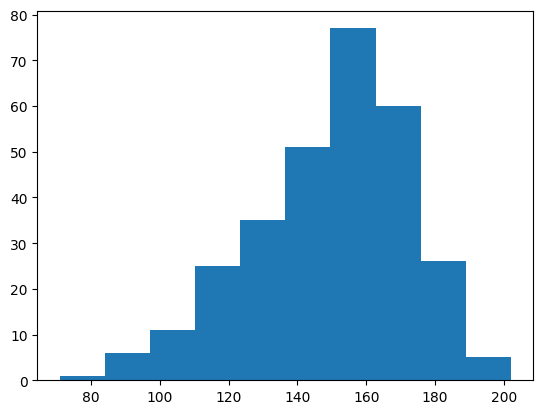

In [12]:
# check normality
plt.hist(df['thalach'])
plt.show()

## Let's apply some models

In [18]:
X = df.drop(columns=['condition'])
Y = df['condition']

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [21]:
clf = RandomForestClassifier(n_estimators=150, max_depth=5, random_state=42)
clf.fit(X_train, y_train)

RandomForestClassifier(max_depth=5, n_estimators=150, random_state=42)

In [24]:
y_pred = clf.predict(X_test)

In [26]:
print("Accuracy:", round(np.sum(y_pred == y_test) / len(y_pred), 3))

Accuracy: 0.733


In [35]:
%load_ext autoreload
%autoreload 2

In [2]:
import sys
sys.path.append("..")

In [43]:
from src.data.make_dataset import *

In [44]:
data = read_data('../data/heart_cleveland_upload.csv')

In [45]:
train_data, val_data = train_test_split(data)

In [46]:
train_data

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,condition
141,44,1,2,120,226,0,0,169,0,0.0,0,0,0,0
125,50,0,2,120,219,0,0,158,0,1.6,1,0,0,0
137,44,0,2,108,141,0,0,175,0,0.6,1,0,0,0
51,49,1,1,130,266,0,0,171,0,0.6,0,0,0,0
227,57,1,3,110,201,0,0,126,1,1.5,1,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
104,57,1,2,150,168,0,0,174,0,1.6,0,0,0,0
205,60,0,3,158,305,0,2,161,0,0.0,0,0,0,1
176,64,0,3,130,303,0,0,122,0,2.0,1,2,0,0
237,56,1,3,132,184,0,2,105,1,2.1,1,1,1,1


In [4]:
import src.entities
from src.entities import TrainingPipelineParams